# LetsGrowMore(LGM)August'21 
Task 1 - Exploratory Data Analysis on Dataset - Terrorism 
Submitted by - Anit Chacko

In [81]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as py
import warnings
import klib
warnings.filterwarnings('ignore')

# READING DATASET OF TERRORISM

In [2]:
df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin1')

In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.shape

(181691, 135)

In [5]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [8]:
df.isnull().sum()


eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

# CLEANING THE DATASET

In [9]:
Cleaned_df=klib.data_cleaning(df)

Shape of cleaned data: (181691, 73)Remaining NAs: 2864593

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 62
     of which 0 single valued.     Columns: []
Dropped missing values: 10989404
Reduced memory by at least: 143.73 MB (-76.8%)



In [10]:
Cleaned_df1=klib.drop_missing(Cleaned_df)

In [11]:
Cleaned_df1.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','region_txt':'Region','city': 'City', 'latitude':'Latitude', 'longitude':'Longitude', 'attacktype1_txt':'Attack_Type','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_Type','weaptype1_txt':'Weapon_Type','motive':'Motive'}, inplace=True)


In [12]:
Cleaned_df1.head()

,eventid,Year,Month,Day,extended,country,Country,region,Region,State,...,addnotes,scite1,scite2,scite3,dbsource,int_log,int_ideo,int_misc,int_any,related
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,<NA>,<NA>,<NA>,<NA>,PGIS,0,0,0,0,<NA>
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,<NA>,<NA>,<NA>,<NA>,PGIS,0,1,1,1,<NA>
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,<NA>,<NA>,<NA>,<NA>,PGIS,-9,-9,1,1,<NA>
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,<NA>,<NA>,<NA>,<NA>,PGIS,-9,-9,1,1,<NA>
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,<NA>,<NA>,<NA>,<NA>,PGIS,-9,-9,1,1,<NA>


# Visualization of Terrorism Dataset


Text(0.5, 1.0, 'Terrorist activities year wise')

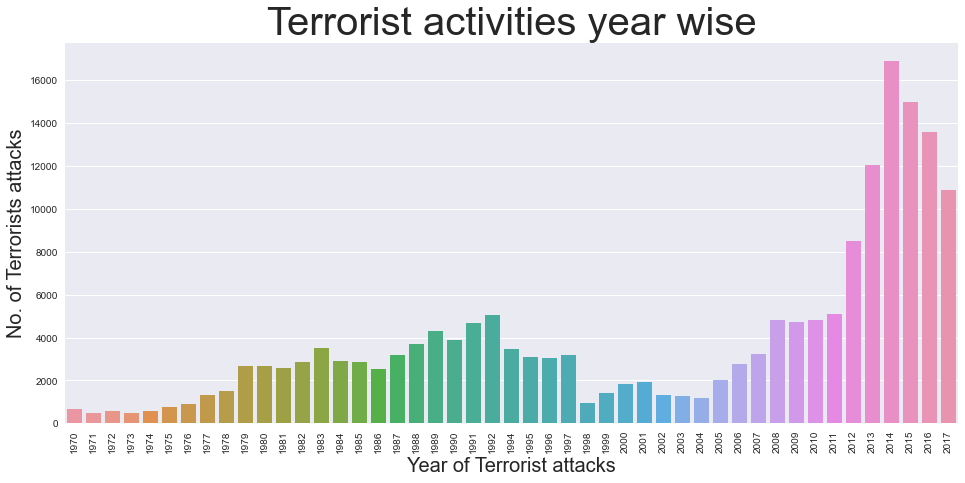

In [13]:
py.style.use('seaborn')
py.subplots(figsize=(16,7))
py.xticks(rotation=90)
x_years=Cleaned_df1['Year'].unique()
y_counts=Cleaned_df1['Year'].value_counts(dropna=False).sort_index()
sn.barplot(x=x_years,y=y_counts)
py.xlabel('Year of Terrorist attacks',fontsize=20)
py.ylabel('No. of Terrorists attacks',fontsize=20)
py.title('Terrorist activities year wise',fontsize=40)

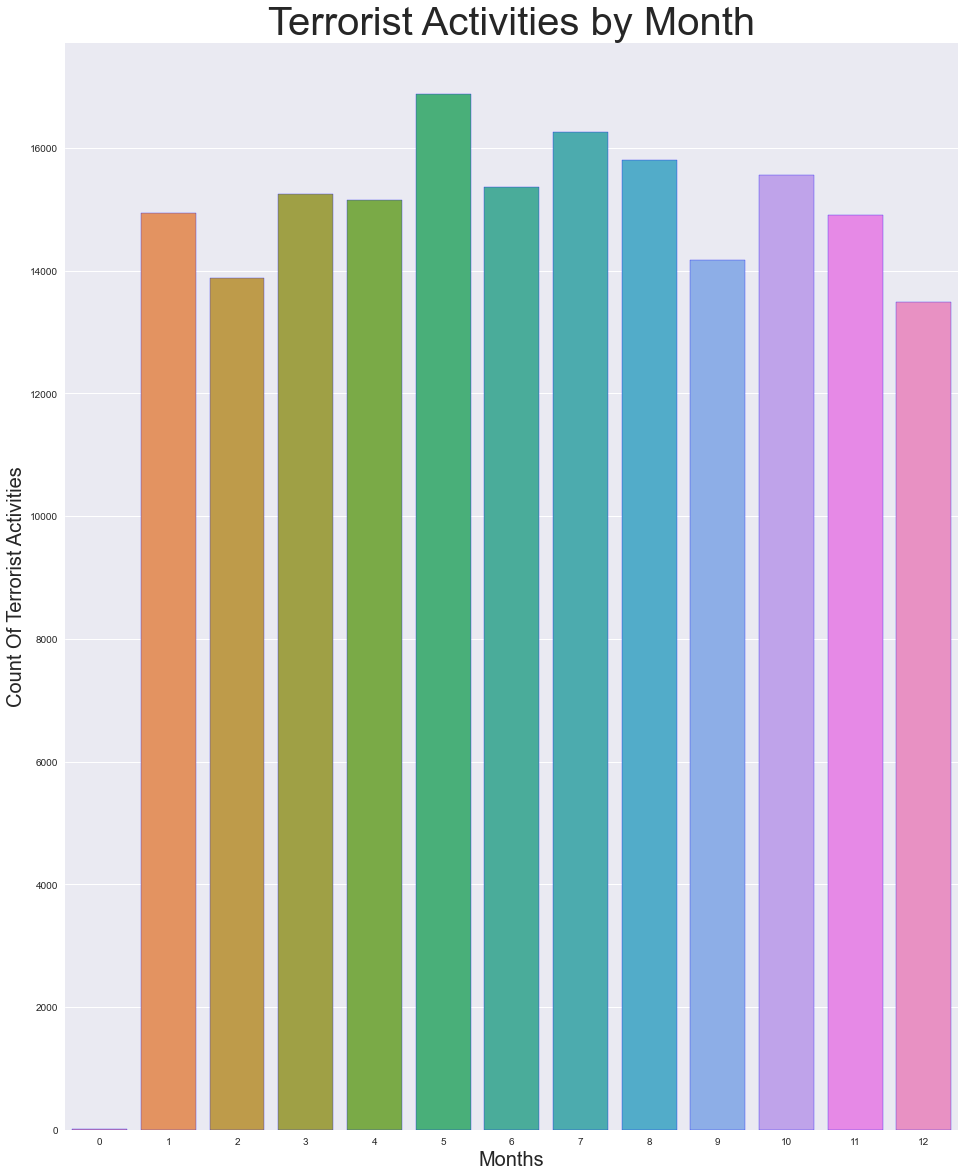

In [93]:
py.figure(figsize=(16, 20))
sn.countplot('Month', data=Cleaned_df1, edgecolor='blue')
py.title('Terrorist Activities by Month',fontsize=40)
py.xlabel('Months', fontsize=20)
py.ylabel('Count Of Terrorist Activities', fontsize=20)
py.show()

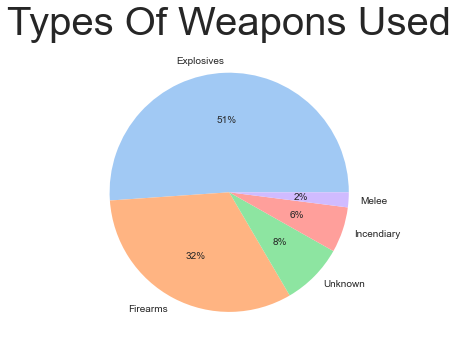

In [21]:
y=Cleaned_df1["Weapon_Type"].value_counts().values[:5]
x=Cleaned_df1["Weapon_Type"].value_counts().index[:5]
colors=sn.color_palette('pastel')[0:8]
py.pie(y,labels=x,colors=colors,autopct='%.0f%%')
py.title('Types Of Weapons Used',fontsize=40)
py.show()



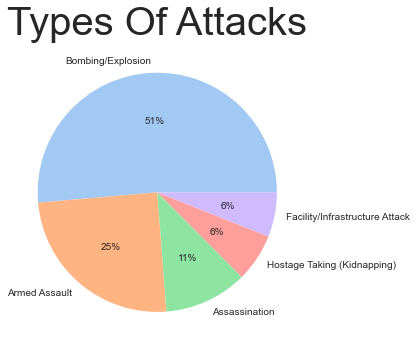

In [24]:
y=Cleaned_df1["Attack_Type"].value_counts().values[:5]
x=Cleaned_df1["Attack_Type"].value_counts().index[:5]
colors=sn.color_palette('pastel')[0:6]
py.pie(y,labels=x,colors=colors,autopct='%.0f%%')
py.title('Types Of Attacks',fontsize=40)
py.show()

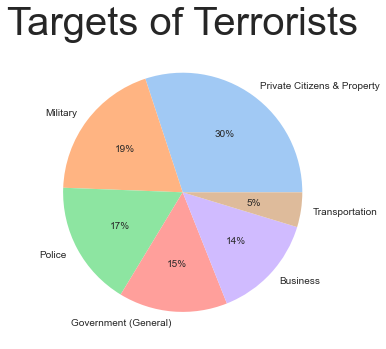

In [28]:
y=Cleaned_df1["Target_Type"].value_counts().values[:6]
x=Cleaned_df1["Target_Type"].value_counts().index[:6]
colors=sn.color_palette('pastel')[0:6]
py.pie(y,labels=x,colors=colors,autopct='%.0f%%')
py.title('Targets of Terrorists',fontsize=40)
py.show()

# Insights from Dataset

In [53]:
Info_Terrorism_Group = Cleaned_df1[['Group','Country','Killed', 'Wounded']]
Info_Terrorism_Group=Info_Terrorism_Group.groupby(['Group','Country'], axis=0).sum().sort_values(['Killed', 'Wounded'], ascending=False).drop('Unknown').reset_index().head(10)
Info_Terrorism_Group


,Group,Country,Killed,Wounded
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0,23697.0
1,Taliban,Afghanistan,29269.0,27871.0
2,Boko Haram,Nigeria,16917.0,7671.0
3,Shining Path (SL),Peru,11595.0,3030.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0,10991.0
5,Al-Shabaab,Somalia,8176.0,6025.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0,4049.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0,4031.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0,728.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0,9518.0


The  insights  derived from the above table are as follows:-
    1.Taliban is the most active terrrorists group.
    2.The country which is mostly affected by terrorism is Iraq.
    3.The number of people which were killed mostly are of Iraq which is approximately 31058.
    4.The number of people which were wounded mostly are of Afghanistan which is approximately 27871.

In [94]:
print("City with the most attacks:",Cleaned_df1['City'].value_counts().index[1]) 
print("Region with the most attacks:",Cleaned_df1['Region'].value_counts().idxmax())
print("Year with the most attacks:",Cleaned_df1['Year'].value_counts().idxmax())
print("Month with the most attacks:",Cleaned_df1['Month'].value_counts().idxmax())
print("Most Attack Types:",Cleaned_df1['Attack_Type'].value_counts().idxmax())
print("Targeted section of people:",Cleaned_df1['Target_Type'].value_counts().idxmax())

City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Most Attack Types: Bombing/Explosion
Targeted section of people: Private Citizens & Property


# Therefore the conclusions from the 'Terrorism'dataset are:-
1.City with the most attacks is Baghdad.
2.Regions with the most attacks are Middle East & North Africa.
3.2014 is the year with the high terrorist attacks.
4.5th month of the year is  with the most attacks.
5.Bombing/Explosion is the most attack types adopted by terrorists.
6.Private Citizens & Property is the most targeted section. 
